# Integration methods in Python

Below are a number of examples of using integration methods from `integration.py`.

The test function is $f_1(x)=1/(1+x^2)$. Note that $\int_0^1f_1(x)\,dx=\pi/4$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 1.0/(1.0+x**2)

exact_val = np.pi/4

import integration # this has the functions in it

### Rectangle rule

In [2]:
a=0
b = 1
n = 10
h = (b-a)/n
print("check: ",h*sum(f1(a+i*h) for i in range(n)) - integration.rectangle(f1,a,b,n),
     " ... should be zero")
print("error = ",integration.rectangle(f1,a,b,n) - exact_val)

check:  0.0  ... should be zero
error =  0.024583333829341414


### Trapezoidal rule

In [3]:
print("error = ", integration.trapezoidal(f1,a,b,n) - exact_val)

error =  -0.00041666617065860834


### Simpson's rule

In [4]:
print("error = ", integration.simpson(f1,a,b,n) - exact_val)

error =  -1.5500201122620183e-10


### Midpoint rule

In [5]:
print("error = ", integration.midpt(f1,a,b,n) - exact_val)

error =  0.00020833285282639835


### General method
This uses the sums $h\,\sum_{j=0}^{n-1}\sum_{i=0}^{m-1}w_i\,f(a+h(j+x_i))$ where the pair $(w,x)$ are the weights and nodes for an integration method on $[0,1]$. 

In [7]:
print("check (rectangle rule): ",
      integration.rectangle(f1,a,b,n)-integration.gen_rule(f1,[1.0],[0.0],a,b,n))
print("check (trapezoidal rule): ",
      integration.trapezoidal(f1,a,b,n)-integration.gen_rule(f1,[0.5,0.5],[0.0,1.0],a,b,n))
print("check (midpoint rule): ",
      integration.midpt(f1,a,b,n)-integration.gen_rule(f1,[1.0],[0.5],a,b,n))
print("check (Simpson's rule): ",
      integration.simpson(f1,a,b,n)-integration.gen_rule(f1,[1/6,2/3,1/6],[0.0,0.5,1.0],a,b,n))

check (rectangle rule):  0.0
check (trapezoidal rule):  0.0
check (midpoint rule):  0.0
check (Simpson's rule):  1.1102230246251565e-16


### Example of using the general method
An example of using the general method is to use the three-point Gauss-Legendre method; on the interval $[0,1]$, this formula is 
$$\int_0^1 g(s)\,ds\approx \frac5{18}g(\frac12-\frac12\sqrt{\frac35})+\frac49g(\frac12)+\frac5{18}g(\frac12+\frac12\sqrt{\frac35}).$$

In [9]:
ws = [5/18, 4/9, 5/18]
xs = [1/2-np.sqrt(3/5)/2, 1/2, 1/2+np.sqrt(3/5)/2]

In [12]:
print("error = ", integration.gen_rule(f1,ws,xs,a,b,n) - exact_val)

error =  -7.439826532618099e-12


In [ ]:
### Asymptotic behavior of the error

In [13]:
nlist  = list(2**k for k in range(1,11))
errs_r = [] # errors for rectangle rule
errs_t = [] # errors for trapezoidal rule
errs_s = [] # errors for Simpson's rule
errs_m = [] # errors for midpoint rule
errs_gl3 = [] # errors for 3-point Gauss-Legendre rule
for n in nlist:
    errs_r.append(np.abs(integration.rectangle(f1,a,b,n)-exact_val))
    errs_t.append(np.abs(integration.trapezoidal(f1,a,b,n)-exact_val))
    errs_s.append(np.abs(integration.simpson(f1,a,b,n)-exact_val))
    errs_m.append(np.abs(integration.midpt(f1,a,b,n)-exact_val))
    errs_gl3.append(np.abs(integration.gen_rule(f1,ws,xs,a,b,n)-exact_val))
errs_r

[0.11460183660255174,
 0.05989595424961058,
 0.030598960225323935,
 0.015462239612898943,
 0.007771809896295445,
 0.0038960774739651427,
 0.0019505818684898424,
 0.0009759267171220998,
 0.00048812230428207926,
 0.00024410088856974266]

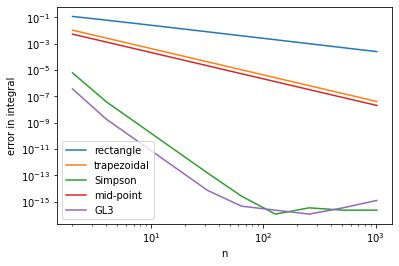

In [15]:
plt.plot(nlist,errs_r)
plt.plot(nlist,errs_t)
plt.plot(nlist,errs_s)
plt.plot(nlist,errs_m)
plt.plot(nlist,errs_gl3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('error in integral')
plt.legend(['rectangle','trapezoidal','Simpson','mid-point','GL3'])
plt.show()